<a href="https://colab.research.google.com/github/Anson422/Anson-Eva-Valerie/blob/main/Stacked%20Bar%20Chart/H%26S_gas_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas

fatal: destination path 'Anson-Eva-Valerie' already exists and is not an empty directory.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb


In [101]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

In [102]:
#download all countries with RU import data
Hungary = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/ds-045409__custom_14788878_spreadsheet.xlsx", sheet_name= "Sheet 20")
Slovakia = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/ds-045409__custom_14788878_spreadsheet.xlsx", sheet_name= "Sheet 33")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [108]:
#Hungary RU import
H_RUvalues = Hungary.loc[20]
H_date = Hungary.loc[8]
H_EXvalues = Hungary.loc[13]
Hungary_data = pd.concat([H_date, H_RUvalues,H_EXvalues], axis=1)
Hungary_data = Hungary_data.rename(columns=Hungary_data.iloc[0]).drop(Hungary_data.index[0])
Hungary_data = Hungary_data.iloc[1:]
Hungary_data = Hungary_data.rename(columns={'Russian Federation (Russia)': 'Import gas from Russia', 'TIME': 'Date',"Extra-EU27 (= 'WORLD' - 'EU27_2020_INTRA')":"Import gas from other countries"})
Hungary_data.index = range(len(Hungary_data.index))
Hungary_data = Hungary_data.loc[433:441]
Hungary_data.index = range(len(Hungary_data.index))
Hungary_data

,Date,Import gas from Russia,Import gas from other countries
0,2024-02,210431609,266890755
1,2024-03,174441346,207002849
2,2024-04,145244872,146477617
3,2024-05,164150274,236914013
4,2024-06,193328493,232008968
5,2024-07,164184959,216261197
6,2024-08,204759408,273584342
7,2024-09,219583055,287178051
8,2024-10,230903703,295163703


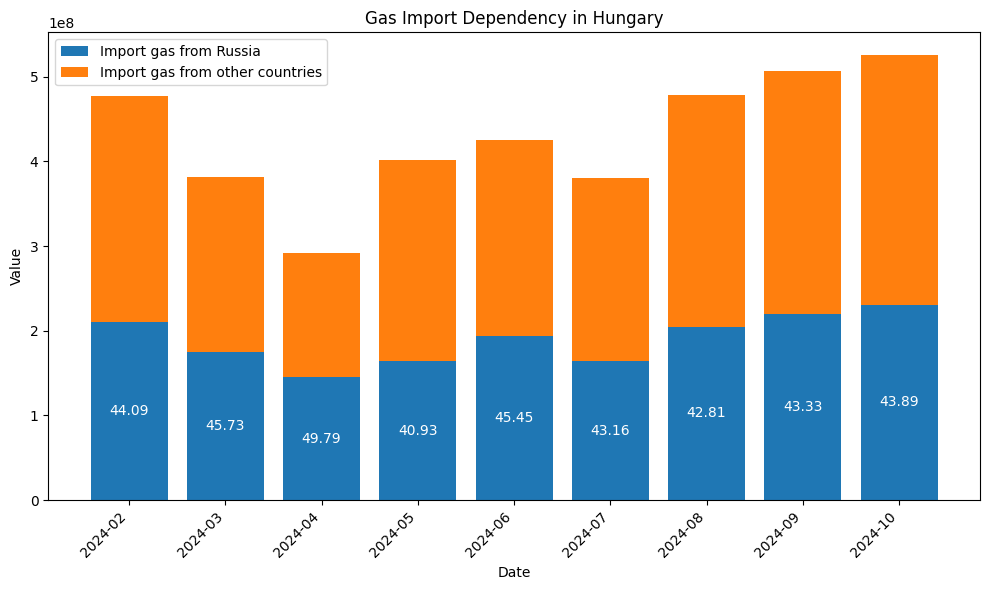

In [116]:
#Draw the chart for Hungary
# set size,style
plt.figure(figsize=(10, 6))

# Calculate total import
Hungary_data['Total gas import'] = Hungary_data['Import gas from Russia'] + Hungary_data['Import gas from other countries']

# Calculate the proportion of Russian gas import
Hungary_data['Proportion'] = Hungary_data['Import gas from Russia'] / Hungary_data['Total gas import']*100

# draw bar chart
# First plot 'Import gas from Russia'
plt.bar(Hungary_data['Date'], Hungary_data['Import gas from Russia'], label='Import gas from Russia')
# Then plot 'Import gas from other countries' on top
plt.bar(Hungary_data['Date'], Hungary_data['Import gas from other countries'], bottom=Hungary_data['Import gas from Russia'], label='Import gas from other countries')


# add titles
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Gas Import Dependency in Hungary')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

# Add proportion annotations
for i, row in Hungary_data.iterrows():
    plt.text(i, row['Import gas from Russia'] / 2, f"{row['Proportion']:.2f}", ha='center', va='center', color='white')

# show the chart
plt.tight_layout()
plt.show()

In [111]:
#Hungary RU import
S_RUvalues = Slovakia.loc[20]
S_date = Slovakia.loc[8]
S_EXvalues = Slovakia.loc[13]
Slovakia_data = pd.concat([S_date, S_RUvalues,S_EXvalues], axis=1)
Slovakia_data = Slovakia_data.rename(columns=Slovakia_data.iloc[0]).drop(Slovakia_data.index[0])
Slovakia_data = Slovakia_data.iloc[1:]
Slovakia_data = Slovakia_data.rename(columns={'Russian Federation (Russia)': 'Import gas from Russia', 'TIME': 'Date',"Extra-EU27 (= 'WORLD' - 'EU27_2020_INTRA')":"Import gas from other countries"})
Slovakia_data.index = range(len(Slovakia_data.index))
Slovakia_data = Slovakia_data.loc[433:441]
Slovakia_data.index = range(len(Slovakia_data.index))
Slovakia_data

,Date,Import gas from Russia,Import gas from other countries
0,2024-02,97465101,97465782
1,2024-03,83992107,83992107
2,2024-04,83832138,83832138
3,2024-05,89794108,89794108
4,2024-06,104317311,104317311
5,2024-07,115780784,115780784
6,2024-08,106566283,106566283
7,2024-09,125468549,125468549
8,2024-10,123987816,123987816


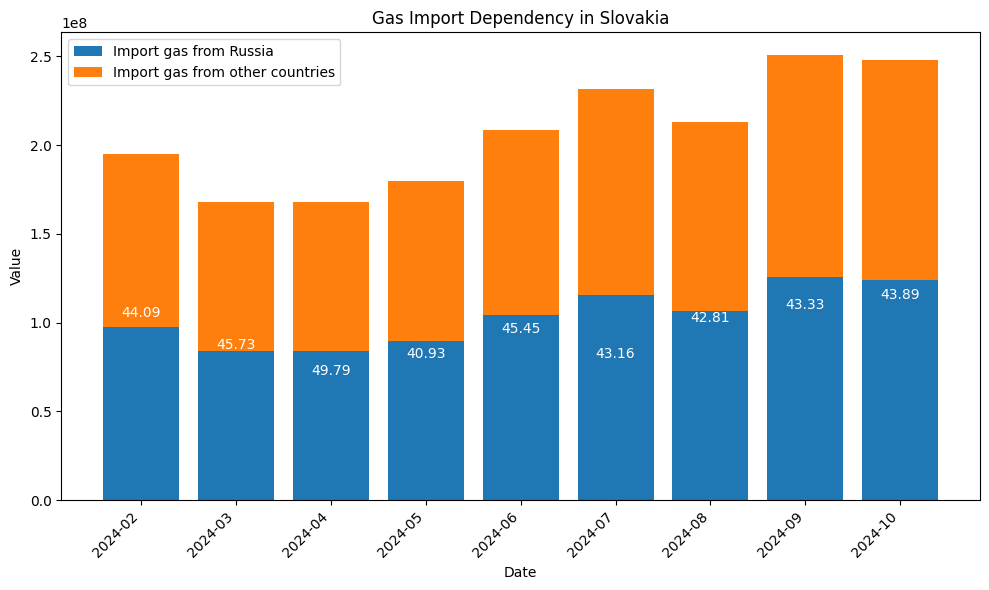

In [118]:
#Draw the chart for Hungary
# set size,style
plt.figure(figsize=(10, 6))

# Calculate total import
Slovakia_data['Total gas import'] = Slovakia_data['Import gas from Russia'] + Slovakia_data['Import gas from other countries']

# Calculate the proportion of Russian gas import
Slovakia_data['Proportion'] = Slovakia_data['Import gas from Russia'] / Slovakia_data['Total gas import']*100

# draw bar chart
# First plot 'Import gas from Russia'
plt.bar(Slovakia_data['Date'], Slovakia_data['Import gas from Russia'], label='Import gas from Russia')
# Then plot 'Import gas from other countries' on top
plt.bar(Slovakia_data['Date'], Slovakia_data['Import gas from other countries'], bottom=Slovakia_data['Import gas from Russia'], label='Import gas from other countries')


# add titles
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Gas Import Dependency in Slovakia')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

# Add proportion annotations
for i, row in Hungary_data.iterrows():
    plt.text(i, row['Import gas from Russia'] / 2, f"{row['Proportion']:.2f}", ha='center', va='center', color='white')

# show the chart
plt.tight_layout()
plt.show()